In [23]:
import os

kernel_sizes = [1, 3, 5, 7, 9, 13, 17, 21, 25, 31, 37, 43, 59, 73, 89, 105, 125, 159, 199]

times = dict()

for kernel_size in kernel_sizes:
    sec_per_megapixel = os.popen(f"./cv_task_2 sample.bmp {kernel_size} {kernel_size}").read()
    times[kernel_size] = list(map(float, sec_per_megapixel.split(' ')[:-1]))
    
import io, json
with io.open('data.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(times, ensure_ascii=False))

In [12]:
import io, json
with io.open('data.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(times, ensure_ascii=False))

Проверим, что файлы получились одинаковые:

In [37]:
s = ""
for k in kernel_sizes:
    for i in range(2, 5):
        s += os.popen(f"diff images/{k}result1.bmp images/{k}result{i}.bmp").read()
    
assert s == ""

График зависимости времени(сек/Мпиксель) от размера ядра:

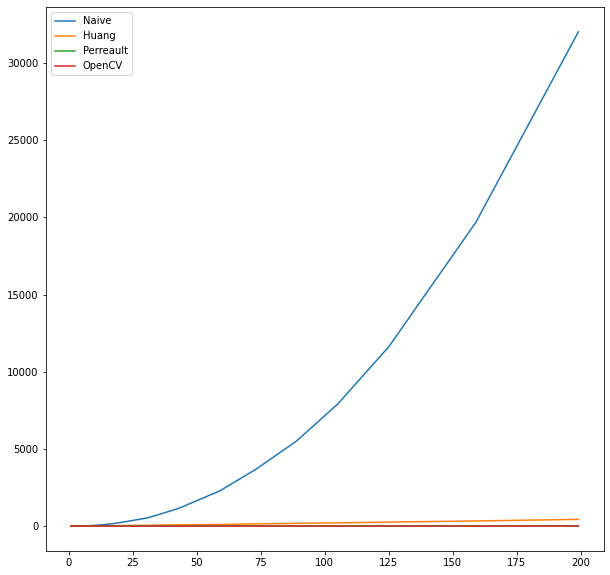

In [30]:
from matplotlib import pyplot as plt
labels = ["Naive", "Huang", "Perreault", "OpenCV"]

def put_plot_data(needed_labels):
    for i in range(len(labels)):
        if labels[i] in needed_labels:
            curr = [times[key][i] for key in times]
            plt.plot(kernel_sizes, curr, label=labels[i])

def plot(needed_labels):
    plt.figure(figsize=(10, 10))
    put_plot_data(needed_labels)
    plt.legend()    
    plt.show()  
    
plot(labels)
  

Видно, что график работы наивной версии ведет себя как квадратичная функция. Посмотрим поближе на все остальные графики:

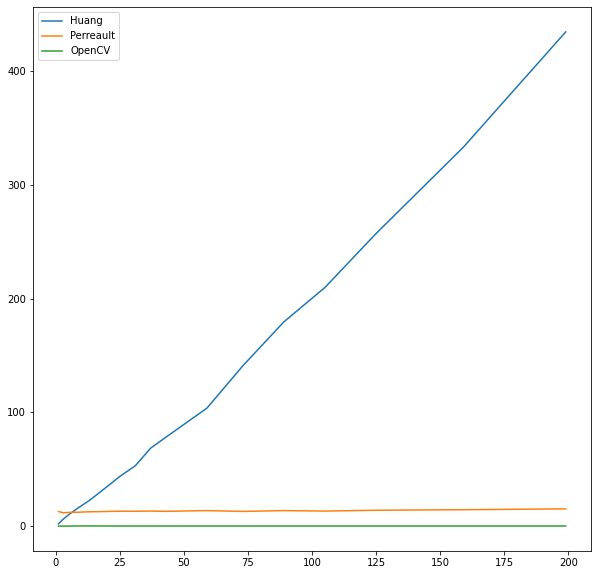

In [31]:
plot(labels[1:])

In [ ]:
Алгоритм Хуанга работает линейно, как и хотелось. Посмотрим поближе на остальные два:

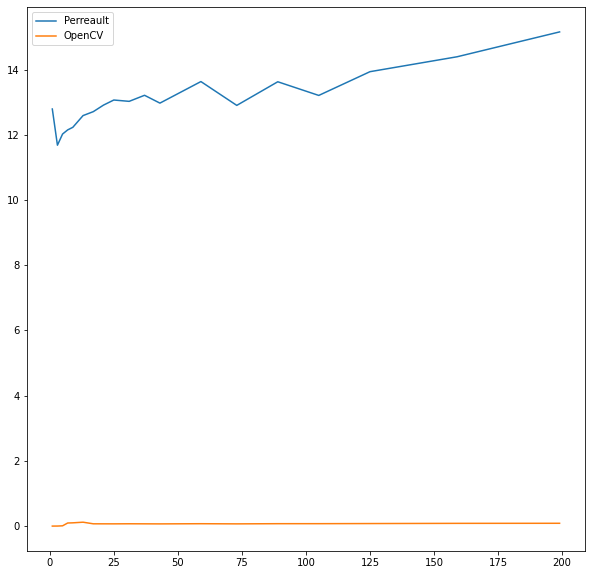

In [32]:
plot(labels[2:])

OpenCV остается непобежденным. Алгоритм Perreault'a немного увеличивает время работы из-за увеличения размера фильтра, потому что там происходит копирование и добавление padding'ов, размер которых пропорционален размеру фильтра.

Сложность по памяти: m*n - изображение(для удобства n>=m), k - размер фильтра. Не будем учитывать затраты на копирование изображения.

Наивный алгоритм: $О(k^2)$ - хранение пикселей для будущей сортировки.

Huang: $O(k^2)$ - кэширование гистограмм предыдущего шага окна.

Perreault: $O(k^2 + k * n)$ - гистограммы столбцов и гистограммы окна.

Huang реализовал через std::map, чтобы он сильнее отличался от Perreault. Его так же можно реализовать через статический массив.

Если реализовать Huang аналогично Perreault, то при маленьких размерах окна он будет эффективнее Perreault. Шаг Pereault делает порядка $2^8$ итераций, в то время как Huang делает $k$ итераций, но с большей константой. Тогда я бы предложил при $k < 2^6$ использовать Huang, иначе - Perreault.